# 일정
> 11/16 제안서  
> 11/30 중간점검  
> 12/17 발표  
> 12/21 최종제출  
> 12/24 동료평가

# TASK
> 데이터 특성 시각화  
> 데이터 특성 시각화 및 대시보드화  
> 시계열자료 및 모델링  
> 회귀  
> 분류  
> 군집화  

# 유의점
> 레퍼런스 활용은 좋으나 베끼지 말기  
> 레퍼런스 인용 추가 필수  

# Covid-19 Statistics

## Data Import & View

먼저 데이터 활용을 위한 여러 라이브러리들을 탑재합니다.  
Numpy, Pandas, Matplotlib, Seaborn과  
분류 기계학습을 위한 SKlearn 라이브러리도 탑재해줍니다.

In [8]:
import numpy as np  # numpy 탑재
import pandas as pd  # pandas탑재
import seaborn as sns  # seaborn(데이터 시각화)탑재
import matplotlib.pyplot as plt  # matplotlib탑재
import os
from os import system
from sklearn import tree
from sklearn.model_selection import train_test_split as TSplit
from sklearn.tree import DecisionTreeClassifier as DTree
from sklearn.ensemble import RandomForestClassifier as RFor
from sklearn.metrics import accuracy_score as Acc
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
import warnings
from IPython.display import display
warnings.filterwarnings('ignore')
%matplotlib inline
print(os.getcwd())
plt.rc("font", family="Malgun Gothic")
# 현재 경로찾기

D:\Python\core-python-main\수업\데이터 분석 프로그래밍


In [9]:
data = pd.read_csv('D:\Python\core-python-main\논문\COVID-19 Serveillence\COVID-19_Case_Surveillance_Public_Use_Data.csv', low_memory=False)
# 원본데이터를 유지하고 학습에 사용할 데이터를 따로 복사
# CSV파일 경로지정
# 총 8405079 개 행의 데이터가 있다.
# cdc_report_dt - CDC 보고일
# pos_spec_dt - 최초 양성 검체 수집일
# onset_dt - 발병일
# current_status - 현 상태
# sex - 성별
# age_group - 연령대
# Race and ethnicity (combined) - 인종/민족
# hosp_yn - 입원 여부
# icu_yn - 중환자실 입실 여부
# death_yn - (COVID-19로 인한)사망 여부
# medcond_yn - 환자의 기저질환 또는 위험행동 여부
data.cdc_report_dt = pd.to_datetime(data.cdc_report_dt) # CDC 보고일을 datetime자료형으로 변환
data.pos_spec_dt = pd.to_datetime(data.pos_spec_dt) # 최초 양성 검체 수집일을 datetime자료형으로 변환
data.onset_dt = pd.to_datetime(data.onset_dt) # 발병일 datetime자료형으로 변환
data.cdc_report_dt = data.cdc_report_dt.dt.strftime('%Y-%m-%d') # datetime중 년 월 일만 표시
data.pos_spec_dt = data.pos_spec_dt.dt.strftime('%Y-%m-%d') # datetime중 년 월 일만 표시
data.onset_dt = data.onset_dt.dt.strftime('%Y-%m-%d') # datetime중 년 월 일만 표시
#data.sort_values(['cdc_report_dt']) # CDC 보고일 순으로 정렬한 데이터 프레임 "보기"
data1 = data
data2 = data
data

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020-11-10,2020-11-10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020-11-14,2020-11-10,2020-11-10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020-11-19,2020-11-10,2020-11-09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020-11-14,2020-11-10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020-11-13,2020-11-10,2020-11-10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8405074,2020-10-22,NaN,NaN,Probable Case,Missing,30 - 39 Years,Unknown,No,Unknown,No,Missing
8405075,2020-10-25,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405076,2020-07-18,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405077,2020-11-19,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing


데이터 정보를 살펴보면 8405079개의 데이터가 있는 것을 볼수 있습니다.  
11가지의 특성들이 있고, 자료형은 모두 object형입니다.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405079 entries, 0 to 8405078
Data columns (total 11 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   cdc_report_dt                  object
 1   pos_spec_dt                    object
 2   onset_dt                       object
 3   current_status                 object
 4   sex                            object
 5   age_group                      object
 6   Race and ethnicity (combined)  object
 7   hosp_yn                        object
 8   icu_yn                         object
 9   death_yn                       object
 10  medcond_yn                     object
dtypes: object(11)
memory usage: 705.4+ MB


min()과 max()모듈을 통해 자료의 시작일과 종료일을 확인합니다  
원본 데이터는 날짜도 문자형태로 저장되어 있었지만  
위에서 pd.to_datetime을 통해 시계열 데이터 형태로 만들어주었기 때문에 가능합니다.

In [11]:
print("start date: ", data["cdc_report_dt"].min())
print("finish date: ", data["cdc_report_dt"].max())

start date:  2020-01-01
finish date:  2020-11-19


## Charts

In [12]:
date = pd.DataFrame(data.value_counts('cdc_report_dt')) # CDC보고일마다 환자가 몇명 발생했는지 종합하여 date에 저장
date = date.sort_index() # date를 날짜순으로 정렬하여 저장

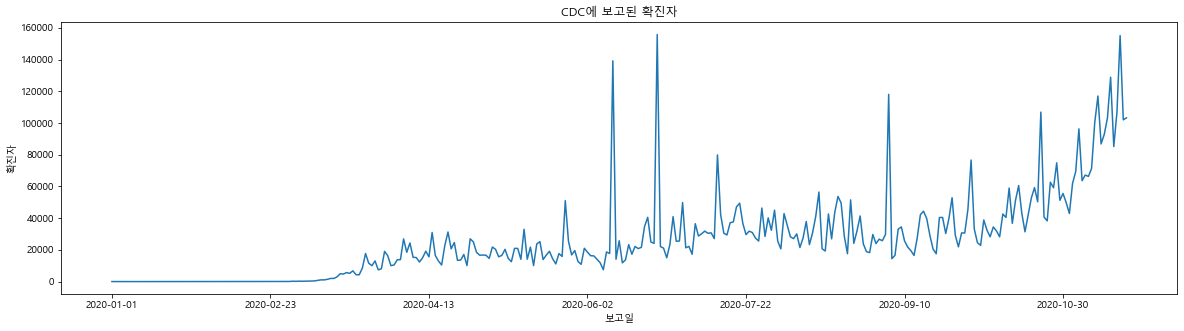

In [13]:
date[0].plot(title='CDC에 보고된 확진자', figsize=(20,5)) #선형그래프 표시
plt.xlabel("보고일") # x축 이름
plt.ylabel("확진자") # y축 이름
plt.show()

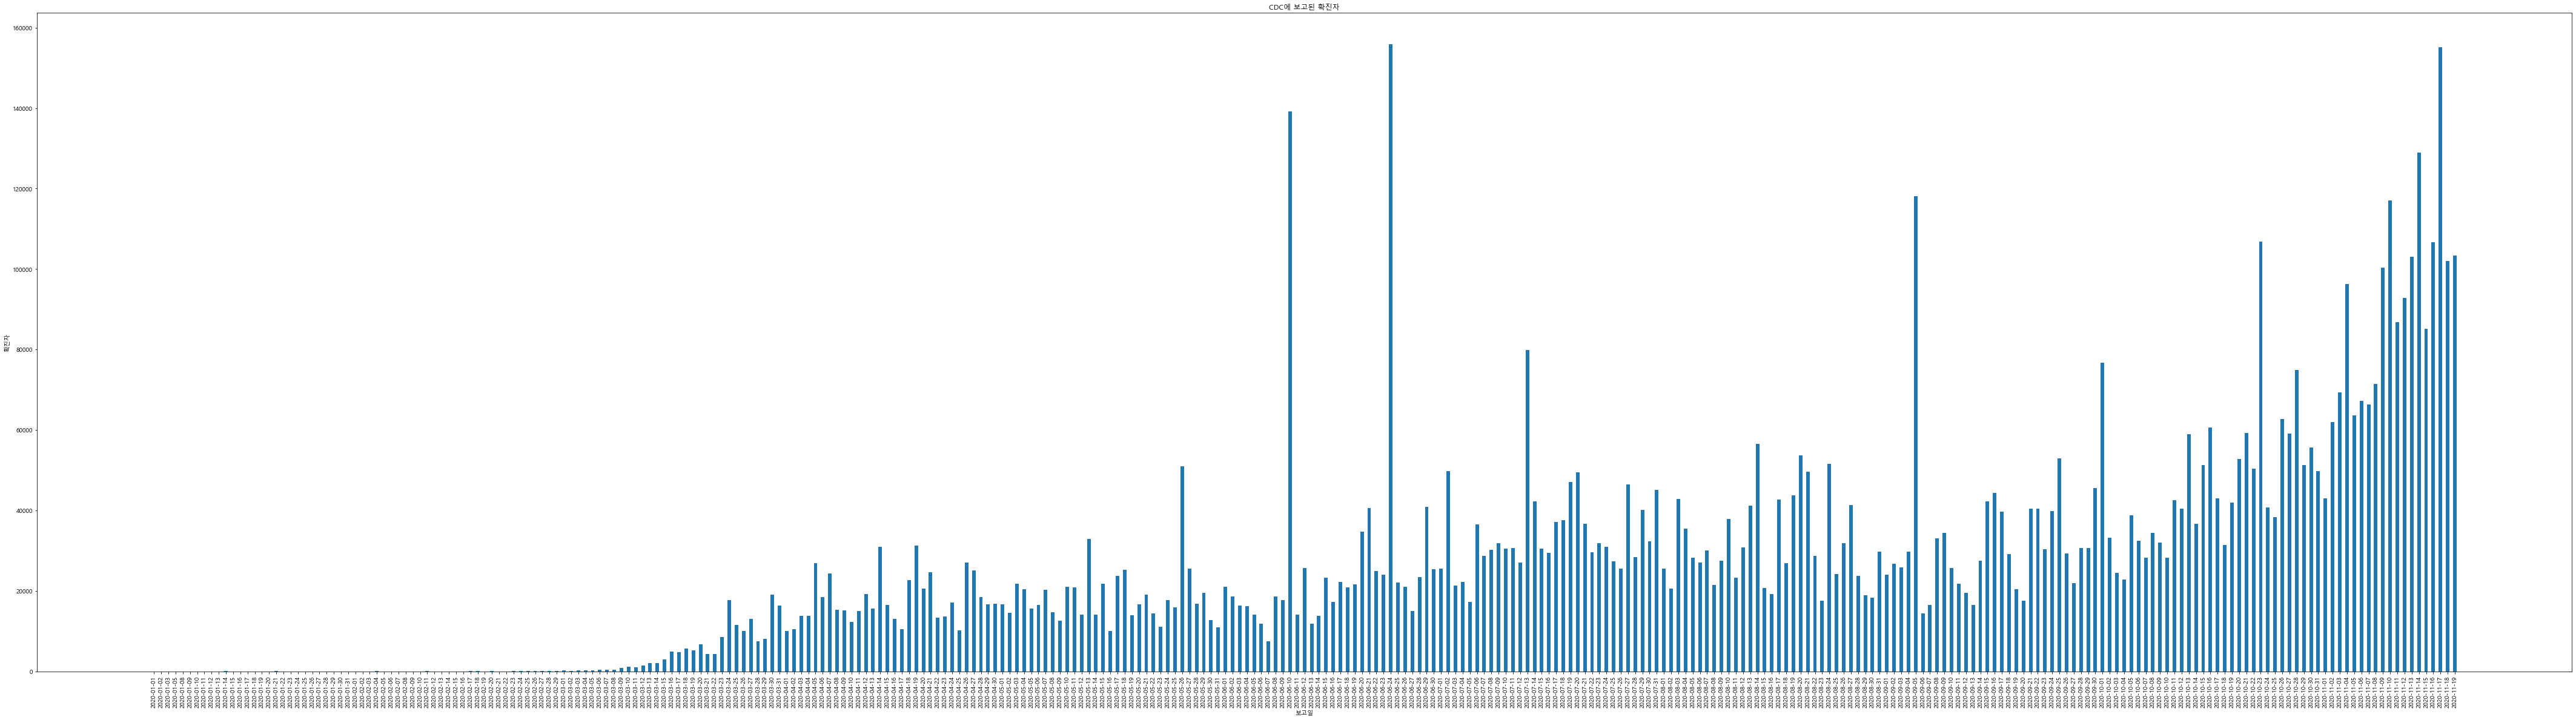

In [14]:
plt.figure(figsize=(75, 20)) # 그래프 크기 조정
plt.bar(range(len(date)), date[0], width=0.5) # 바 그래프 생성, x축은 date의 인덱스 갯수만큼 간격, y축은 date의 내용(칼럼이름 0) = 확진자 보고수량
plt.title("CDC에 보고된 확진자") # 제목
plt.xlabel("보고일") # x축 이름
plt.ylabel("확진자") # y축 이름
plt.xticks(range(len(date)), date.index, rotation = 90) # x축 단위간격들의 이름이 너무 길기 때문에, 90도로 돌려서 표기
plt.show()

In [15]:
race = pd.DataFrame(data.value_counts('Race and ethnicity (combined)')) # 인종별 환자가 몇명 발생했는지 확인하여 데이터 프레임 삽입
race = race.sort_index() # 인덱스의 이름(알파벳) 순서대로 정렬하여 저장

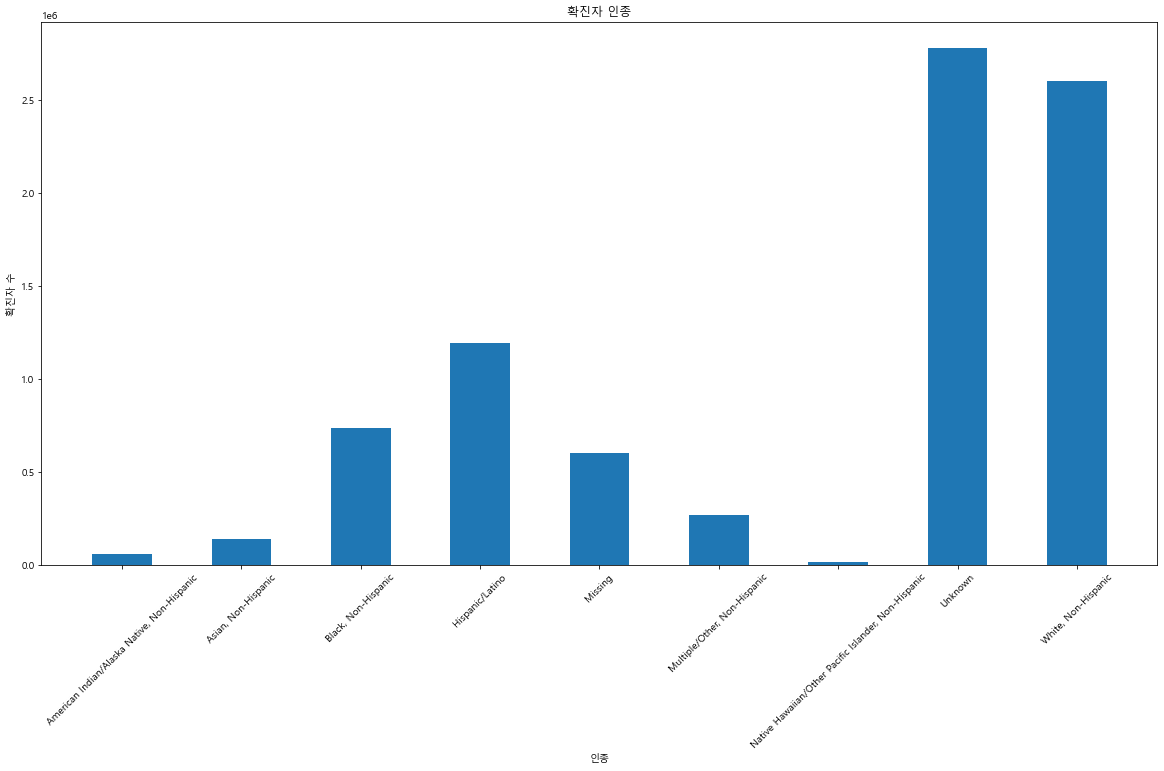

In [16]:
plt.figure(figsize=(20,10)) # 그래프 크기 조정
plt.bar(range(len(race)), race[0], width=0.5) # 바 그래프 생성, x축은 race의 인덱스 갯수만큼 간격, y축은 race의 내용(칼럼이름 0) = 확진자 보고수량
plt.title("확진자 인종") # 제목
plt.xlabel("인종") # x축 이름
plt.ylabel("확진자 수") # y축 이름
plt.xticks(range(len(race)), race.index, rotation = 45) # x축 단위간격들의 이름이 너무 길기 때문에, 45도로 돌려서 표기
plt.show() # show명령으로 표시하면 계산 내용은 감춤

In [17]:
age = pd.DataFrame(data.value_counts('age_group')) # 연령별 환자가 몇명 발생했는지 확인하여 데이터 프레임 삽입
age = age.sort_index() # 연령 순서대로 정렬하여 저장

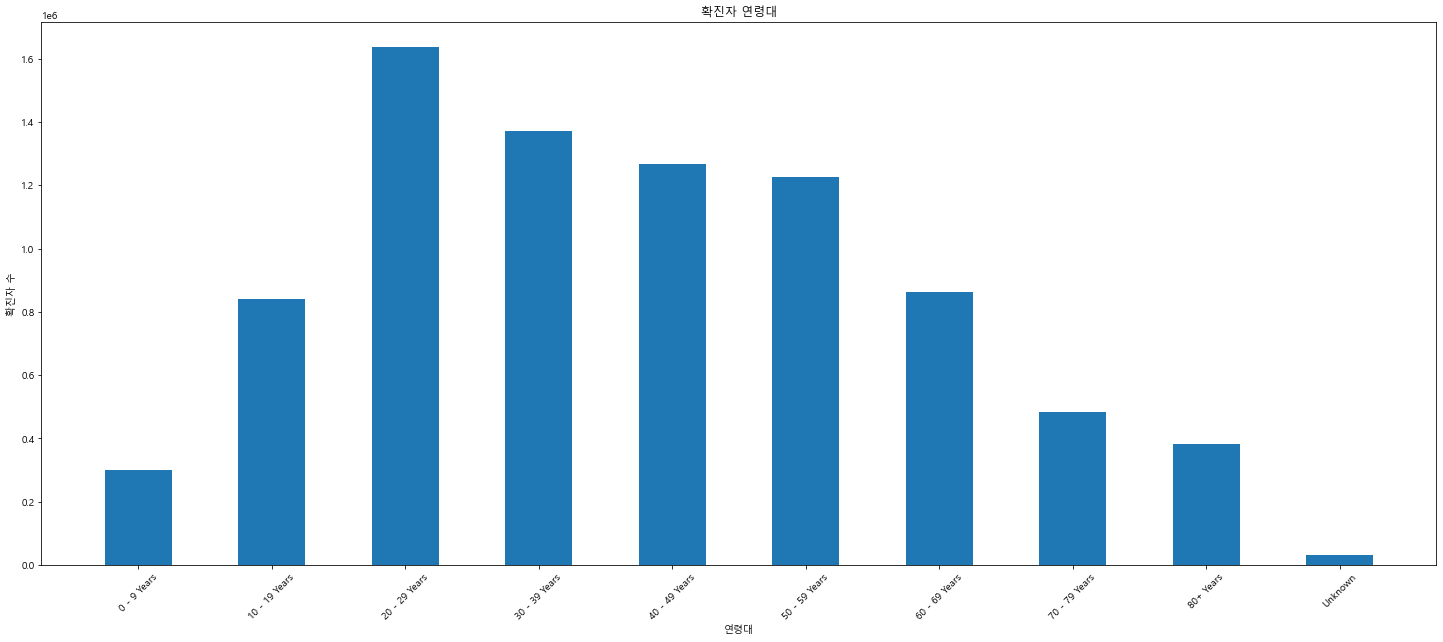

In [18]:
plt.figure(figsize=(25, 10)) # 그래프 크기 조정
plt.bar(range(len(age)), age[0], width=0.5) # 바 그래프 생성, x축은 age의 인덱스 갯수만큼 간격, y축은 age의 내용(칼럼이름 0) = 확진자 보고수량
plt.title("확진자 연령대") # 제목
plt.xlabel("연령대") # x축 이름
plt.ylabel("확진자 수") # y축 이름
plt.xticks(range(len(age)), age.index, rotation = 45) # x축 단위간격들의 이름이 너무 길기 때문에, 45도로 돌려서 표기
plt.show() # show명령으로 표시하면 계산 내용은 감춤

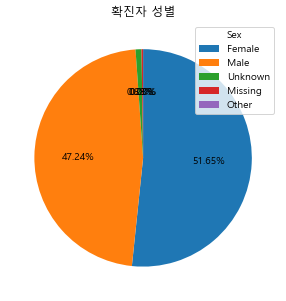

In [19]:
sex = pd.DataFrame(data.value_counts('sex')) # 성별 별 확진자수를 계산하여 데이터 프레임 저장
plt.figure(figsize=(5,5)) # 파이차트 크기
plt.title("확진자 성별") # 제목
plt.pie(sex[0], labels=None, autopct='%.2f%%', startangle=90, counterclock=False) # 내용(컬럼 0)삽입, 차트에는 레이블 없음, 소수점2자리까지, 각도90도
plt.legend(title='Sex', labels=sex.index, loc='upper right') # 범례 내용 - 제목, 인덱스목록(범주들 이름), 범례 위치
plt.show()

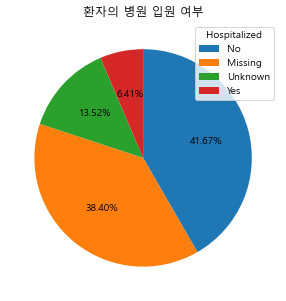

In [20]:
hospital = pd.DataFrame(data.value_counts('hosp_yn'))
plt.figure(figsize=(5,5))
plt.title("환자의 병원 입원 여부")
plt.pie(hospital[0], labels=None, autopct='%.2f%%', startangle=90, counterclock=False)
plt.legend(title='Hospitalized', labels=hospital.index, loc='upper right')
plt.show()

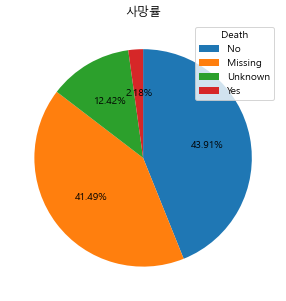

In [21]:
death = pd.DataFrame(data.value_counts('death_yn'))
plt.figure(figsize=(5,5))
plt.title("사망률")
plt.pie(death[0], labels=None, autopct='%.2f%%', startangle=90, counterclock=False)
plt.legend(title='Death', labels=death.index, loc='upper right')
plt.show()

## Data Preprocessing

In [22]:
print(data1.isnull().sum())

cdc_report_dt                          0
pos_spec_dt                      5534290
onset_dt                         4009122
current_status                         0
sex                                   18
age_group                             89
Race and ethnicity (combined)          7
hosp_yn                                0
icu_yn                                 0
death_yn                               0
medcond_yn                             0
dtype: int64


In [23]:
data1.cdc_report_dt = data1.cdc_report_dt.dt.strftime('%m')
# 월 단위만 표시
data1 = data1.drop(["pos_spec_dt", "onset_dt", "medcond_yn"], axis=1)

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
datap['cdc_report_dt'] = datap['cdc_report_dt'].map({
    '01' : 1,
    '02' : 2,
    '03' : 3,
    '04' : 4,
    '05' : 5,
    '06' : 6,
    '07' : 7,
    '08' : 8,
    '09' : 9,
    '10' : 10,
    '11' : 11,
})
data['current_status'] = data['current_status'].map({
    'Laboratory-confirmed case' : 0,
    'Probable Case' : 1,
})
data['sex'] = data['sex'].map({
    'Male' : 0,
    'Female' : 1,
})
data['age_group'] = data['age_group'].map({
    '0 - 9 Years' : 0,
    '10 - 19 Years' : 10,
    '20 - 29 Years' : 20,
    '30 - 39 Years' : 30,
    '40 - 49 Years' : 40,
    '50 - 59 Years' : 50,
    '60 - 69 Years' : 60,
    '70 - 79 Years' : 70,
    '80+ Years' : 80,
}) # 문자열 변환을 위해 각 연령대를 의미하는 숫자로 변환
data['Race and ethnicity (combined)'] = data['Race and ethnicity (combined)'].map({
    'White, Non-Hispanic' : 0,
    'Hispanic/Latino' : 1,
    'Black, Non-Hispanic' : 2,
    'Asian, Non-Hispanic' : 3,
    'Multiple/Other, Non-Hispanic' : 4,
    'Native Hawaiian/Other Pacific Islander, Non-Hispanic' : 5,
    'American Indian/Alaska Native, Non-Hispanic' : 6,
})
data['hosp_yn'] = data['hosp_yn'].map({
    'No' : 0,
    'Yes' : 1,
})
data['icu_yn'] = data['icu_yn'].map({
    'No' : 0,
    'Yes' : 1,
})
data['death_yn'] = data['death_yn'].map({
    'No' : 0,
    'Yes' : 1,
})
data = data.replace('Unknown', np.NaN)
data = data.replace('Missing', np.NaN)
data = data.replace('Other', np.NaN)
data = data.dropna(axis = 0) 
#자료 내부에 이상값을 전부 제외 = nan